In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [5]:
x=df[['Pclass','Sex', 'Age','Fare']]
x

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [6]:
from sklearn.preprocessing import LabelEncoder
Sex = LabelEncoder()
Age = LabelEncoder()
Fare = LabelEncoder()
x['Sex_n'] = Sex.fit_transform(x['Sex'])
x['Age_n'] = Age.fit_transform(x['Age'])
x['Fare_n'] = Fare.fit_transform(x['Fare'])

In [7]:
x=x[["Sex_n","Age_n","Fare_n"]]
x

,Sex_n,Age_n,Fare_n
0,1,28,18
1,0,52,207
2,0,34,41
3,0,48,189
4,1,48,43
...,...,...,...
886,1,35,85
887,0,24,153
888,0,39,131
889,1,34,153


In [8]:
y=df['Survived']

In [9]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [10]:
len(x_train)

712

In [11]:
len(x_test)

179

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
model.score(x_test,y_test)

0.7541899441340782

In [14]:
model.predict([[0,20,83]])

array([1], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

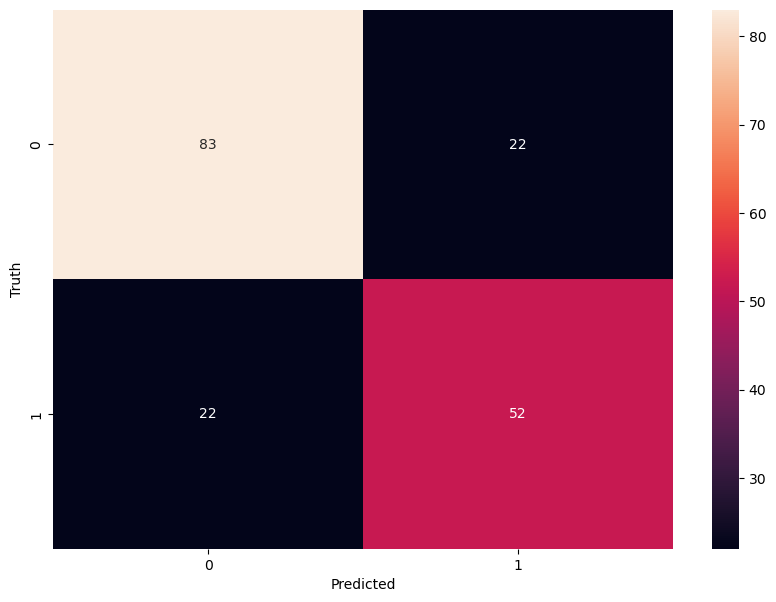

In [15]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')